# Sudoku Solver

In this assignment you are asked to **solve a Sudoku** in a photo.

You will need to implement the entire image preprocessing and digit recognition pipeline,\
whereas an algorithm for solving the Sudoku puzzle will be provided.

## Submission

To complete this task correctly and efficiently, here are some rules and recommendations:

* Plagiarism is **not allowed**!\
  Discussions with your colleagues must not be converted to a copy-paste solution.

* Instead of rewriting existing code **use built-in methods** available in the libraries.\
  There exists a class/method for most of the functions needed in this Assignment.

* We recommend that you **go through the relevant documentation and links** in this notebook.\
  In this assignment we will mainly use [numpy](https://numpy.org/doc/stable/), [opencv](https://opencv.org/), [scikit-image](https://scikit-image.org/) and [matplotlib](https://matplotlib.org/) libraries.\
  Also remember that tutorials, lecture slides, [Google](https://www.google.com/) and [StackOverflow](https://stackoverflow.com/) are your close friends throughout the course.

* Your code must be readable by any competent reviewer.\
  For this purpose, include **necessary** (and no more) comments inside the code.\
  However, remember: **good code must be self-explanatory**.

* In all files you are allowed to write **your code only between** the following placeholders:

    ```python
    # BEGIN YOUR ...
    
    # END YOUR ...
    ```
    \
  Once you implement something you can remove
  ```python
    raise NotImplementedError
  ```
  \
    **!Attention!** Everything else must remain as is.

---

**Before the submission**

1. Run `create_templates.py` to ensure that your templates are being created in the `templates` folder.\
   You are allowed to create **no more than 2** templates for each digit.
2. Run `test.py` to ensure that your implementation works.

---
Please **upload the following files to ILIAS**:

* `frontalization.py`
* `recognition.py`
* `template.py`

**P.S.:** You will get <span style="color:red">**-10 points**</span> if you upload unnecessary files!

## Assignment

You need to follow this notebook and implement all the necessary code snippets in the following files:

* `frontalization.py`
* `recognition.py`
* `template.py`

In _this_ jupyter notebook you can test different steps of your pipeline,\
whereas the file `test.py` will be used to test your implementation.

The folder `./sudoku_puzzles/train` contains images of Sudoku puzzles.\
You can find images taken:
* under different light conditions
* from different viewpoints
* with digits printed in different styles

<div style="display: flex; justify-content: space-between;">
  <figure style="margin-left: 10px; margin-right: 0;">
    <figcaption>image_0.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_0.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_1.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_1.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_2.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_2.jpg" width="115">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_3.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_3.jpg" width="115">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_4.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_4.jpg" width="200">
  </figure>
</div>

<div style="display: flex; justify-content: space-between;">
  <figure style="margin-left: 10px; margin-right: 0;">
    <figcaption>image_5.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_5.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_6.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_6.jpg" width="200">
  </figure>
  
  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_7.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_7.jpg" width="200">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_8.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_8.jpg" width="200">
  </figure>

  <figure style="margin-left: 5px; margin-right: 0;">
    <figcaption>image_9.jpg</figcaption>
    <img src="./sudoku_puzzles/train/image_9.jpg" width="115">
  </figure>
</div>

The folder `./sudoku_puzzles/test` is not available to you and will be used to test your pipeline.\
However, rest assured that the Sudoku puzzles in the test images are in the same font and printing style as those in the train images.

## Grading

There are $10$ images in the train set and $10$ images in the test set.

### Frontalization [max $\mathbf{50}$ points]

* **[max $\mathbf{20}$ points]** if frontalization works on images from the **_train_** set
* **[max $\mathbf{20}$ points]** if frontalization works on images from the **_test_** set

**$2$ points are given for each valid result**

---

* **[$\mathbf{5}$ points]** if frontalization works on **all** images from the **_train_** set
* **[$\mathbf{5}$ points]** if frontalization works on **all** images from the **_test_** set

---

### Recognition [max $\mathbf{50}$ points]

* **[max $\mathbf{20}$ points]** if recognition works (_$3$ or fewer errors out of $81$ sudoku cells_) on images from the **_train_** set
* **[max $\mathbf{20}$ points]** if recognition works (_$3$ or fewer errors out of $81$ sudoku cells_) on images from the **_test_** set

**$2$ points are given for each valid result**

---

* **[$\mathbf{5 \cdot r}$ points]** where $\mathbf{r}$ is the proportion of successfully recognized images among successfully frontalized images from the **_train_** set
* **[$\mathbf{5 \cdot r}$ points]** where $\mathbf{r}$ is the proportion of successfully recognized images among successfully frontalized images from the **_test_** set

## 0. Read Sudoku Image

Read an image of the Sudoku puzzle as an example to see what happened at each step of your _sudoku_solver_ pipeline.

After all, we need to recognize the digits inside the Sudoku grid.\
All digits are color-independent. So we will be working with _grayscale_ images.

In [1]:
import os

from const import TRAIN_IMAGES_PATH
from utils import read_image, show_image

In [2]:
image_path = os.path.join(TRAIN_IMAGES_PATH, "image_0.jpg")
sudoku_image = read_image(image_path=image_path)

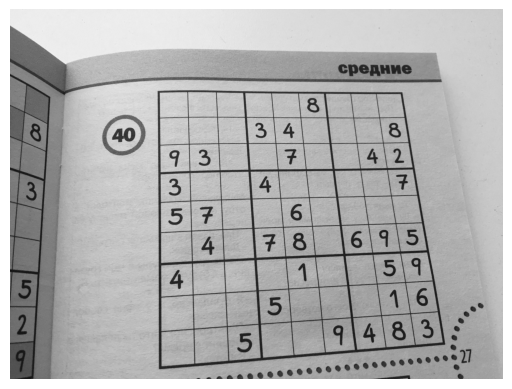

In [3]:
show_image(sudoku_image, as_gray=True)

### 0.1 Pipeline

For your convenience, there is a _Pipeline_ class in the `pipeline.py` file.

In [4]:
from pipeline import Pipeline

This class will be used to test your pipeline.\
You can also use this class to display what happened after each step of your pipeline.\
For example:

```python
pipeline = Pipeline(functions=[find_edges, find_contours, get_max_contour, find_corners, frontalize_image],
                    parameters={"find_corners": {"epsilon": ...}})

image, output = pipeline(sudoku_image, plot=True, figsize=(18, 12))
```

## 1. Frontalization

This is a high-level view of the first part of the sudoku solver.\
Below in the sections you will find the step-by-step instructions.

With this part we will transform and crop an image with a Sudoku to avoid unnecessary background information.\
After that, we will be left with an image with only a $9\times 9$ Sudoku grid and digits inside.

Working with frontalized patches with digits is an important step for successful recognition of the digits.

To **frontalize** an image we need to apply a transformation that maps the distorted Sudoku grid in the input image to a rectified squared Sudoku grid. To do so we need to find the $4$ corners of the Sudoku grid and to find these corners we need to find the closed contour with the maximum area.

You need to implement the functions inside the `frontalization.py` file.

### 1.1 Find Max Contour

A [_contour_](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html) can be explained simply as a curve joining all the continuous points (along the boundary) that have the same intensity.\
Each individual contour is an array of $(x, y)$ coordinates of boundary points of the object.

#### 1.1.1 Find Edges

For better accuracy, we should use binary images.\
That is why we will use edges as input to find contours.

In [5]:
from frontalization import find_edges

[[234 236 237 ... 204 205 206]
 [234 236 237 ... 205 206 206]
 [234 236 237 ... 206 207 207]
 ...
 [ 74  82  89 ... 174 177 180]
 [ 79  84  89 ... 175 178 179]
 [ 79  80  81 ... 177 177 178]]


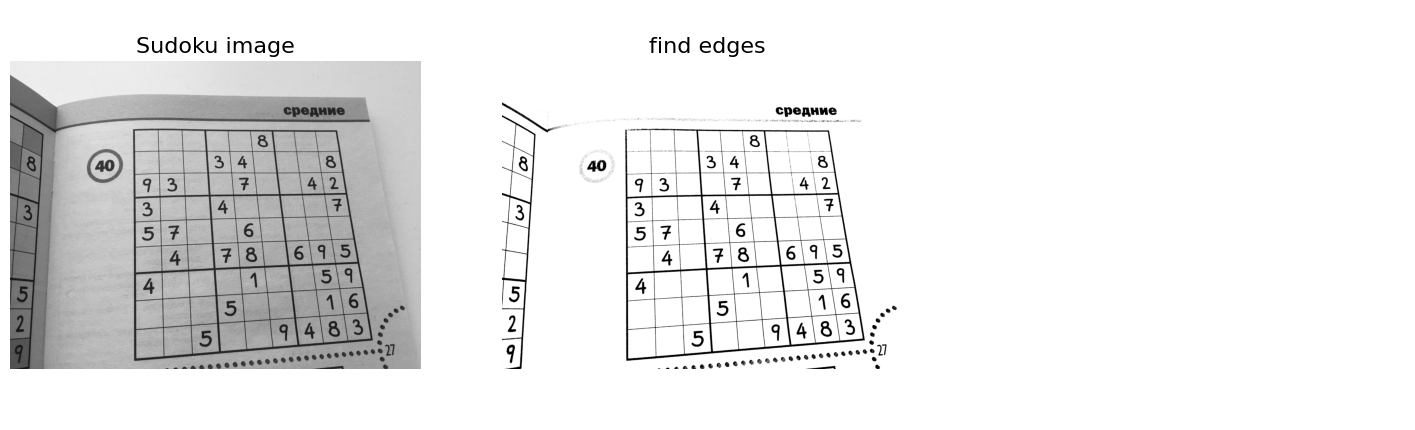

In [6]:
pipeline = Pipeline(functions=[find_edges])
_ = pipeline(sudoku_image, plot=True)

#### 1.1.2 Highlight Edges

The edges found seem to be thin.\
To make them thicker we need to add pixels to the boundaries of objects in an image.

For example, [_morphological dilation_](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.dilation) makes objects more visible and fills in small holes in objects.\
So, lines appear thicker and filled shapes appear larger.

Will this help find the contour of the maximum area?

In [13]:
from frontalization import highlight_edges

In [ ]:
pipeline = Pipeline(functions=[find_edges, highlight_edges])
_ = pipeline(sudoku_image, plot=True, figsize=(24, 24))

[[234 236 237 ... 204 205 206]
 [234 236 237 ... 205 206 206]
 [234 236 237 ... 206 207 207]
 ...
 [ 74  82  89 ... 174 177 180]
 [ 79  84  89 ... 175 178 179]
 [ 79  80  81 ... 177 177 178]]


NotImplementedError: 

#### 1.1.3 Find Contours

We assume that in the image the Sudoku grid will have a maximum area contour (see contour definition above).\
So, we need to find all the contours and then select the one with the maximum area.

In [ ]:
from frontalization import find_contours

In [ ]:
pipeline = Pipeline(functions=[find_edges, highlight_edges, find_contours])
_ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

#### 1.1.4 Get Maximum Area Contour

In [ ]:
from frontalization import get_max_contour

Compare two pipelines: **with** and **without** edge highlighting.\
Is there any difference in getting the maximum area contour?

In [ ]:
pipeline = Pipeline(functions=[find_edges, highlight_edges, find_contours, get_max_contour])
_ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

In [ ]:
pipeline = Pipeline(functions=[find_edges, find_contours, get_max_contour])
_ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

### 1.2 Find Corners

The found contour consists of a large number of points.\
To get $4$ corners of a quadrilateral related to this contour we need to find an approximation of this contour with fewer vertices.

Ideally, we need an approximated contour with $4$ points.\
[The Ramer–Douglas–Peucker algorithm](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm) finds a [simplified curve](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html) consisting of a subset of the points that defined the original curve.\
This algorithm has an adjustable parameter $\varepsilon$ that defines the maximum distance between the original curve and the simplified one.\
Will we always have $4$ points in our approximated contour?

Additionally, for further convenience, we would like to return an array of corner points in order

$$[\text{top left, top right, bottom right, bottom left}]$$

In [ ]:
from frontalization import find_corners

In [ ]:
pipeline = Pipeline(functions=[find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
                    parameters={"find_corners": {"epsilon": 0.42}}) # play with the "epsilon" parameter
_ = pipeline(sudoku_image, plot=True, figsize=(24, 12))

### 1.3 Tricks

#### 1.3.1 Rescaling

For [rescaling](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) with the $\text{scale factor} < 1$ Gaussian smoothing will be performed to avoid aliasing artifacts.\
That is, the rescaled image will be blurry and have less noise. That is why stronger edges and contours could be found.

In [ ]:
from frontalization import rescale_image

In [ ]:
print(f"original image shape: {sudoku_image.shape}\nrescaled image shape: {rescale_image(sudoku_image, scale=0.5).shape}")

In [ ]:
pipeline = Pipeline(functions=[rescale_image, find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
                    parameters={"rescale_image": {"scale": 0.42}, # play with the "scale" parameter
                                "find_corners": {"epsilon": 0.42}}) # play with the "epsilon" parameter
_ = pipeline(sudoku_image, plot=True, figsize=(24, 18))

#### 1.3.2 Gaussian Blur

We can directly (without image resizing) remove high-frequency noise using [Gaussian blur](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian).

In [ ]:
from frontalization import gaussian_blur

In [ ]:
pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners],
                    parameters={"gaussian_blur": {"sigma": 0.42}, # play with the "sigma" parameter
                                "find_corners": {"epsilon": 0.42}}) # play with the "epsilon" parameter
_ = pipeline(sudoku_image, plot=True, figsize=(24, 18))

### 1.4 Perspective Transformation

The _perspective transformation_ is associated with the change in the viewpoint.\
With this transformation the straight lines will remain straight, but parallelism, line lengths and angles will not be preserved.

For this transformation $4$ points on the input image and the desired $4$ points on the output image are enough! Why?\
One can use [cv2.getPerspectiveTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga20f62aa3235d869c9956436c870893ae) to find the transformation matrix and then [cv2.warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) to perform the perspective transformation.

We know that usually Sudoku puzzles are squared grids ($9\times 9$ in our case).\
That is why the final **warped (frontalized) image must be squared** (height equals width)!

In [ ]:
from frontalization import frontalize_image, show_frontalized_images

In [ ]:
pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners, frontalize_image],
                    parameters={"gaussian_blur": {"sigma": 0.42}, # play with the "sigma" parameter
                                "find_corners": {"epsilon": 0.01}}) # play with the "epsilon" parameter
_ = pipeline(sudoku_image, plot=True, figsize=(24, 18))

In [ ]:
image_paths=[os.path.join(TRAIN_IMAGES_PATH, file_name) for file_name in sorted(os.listdir(TRAIN_IMAGES_PATH))
             if 'jpg' in os.path.splitext(file_name)[1]]

show_frontalized_images(image_paths=image_paths, pipeline=pipeline, figsize=(16, 12))

## 2. Digit Recognition

We will use frontalized cross-correlation score for digit recognition.\
As a result, we will get a $2\text{D}$ array (Sudoku matrix) of recognized digits and empty cells in the Sudoku grid.

To achieve this we should

1. manually create templates of all possible digits;
2. recognize digits based on frontalized cross-correlation scores between cells and templates.

You need to implement the functions inside the `recognition.py` file.

### 2.1 Create Templates

To create templates of digits printed in different styles we need to

1. go through different Sudoku images,
2. cut them into $9\times 9 = 81$ cells and
3. save binarized images of cells with different digits.

#### 2.1.1 Resize

To deal with images of different sizes we need to standardize the size of a single cell and consequently the size of the Sudoku grid (frontalized image).\
Let's use $64\times 64$ as the cell size and, accordingly, $576\times 576$ as the frontalized image size.

In [ ]:
from const import SUDOKU_SIZE
from recognition import resize_image

In [ ]:
pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners, frontalize_image,
                               resize_image],
                    parameters={"gaussian_blur": {"sigma": 0.42}, # play with the "sigma" parameter
                                "find_corners": {"epsilon": 0.42}, # play with the "epsilon" parameter
                                "resize_image": {"size": SUDOKU_SIZE}})
_, _ = pipeline(sudoku_image, plot=True, figsize=(24, 18))

#### 2.1.2 Get Sudoku Cells

Two questions are important here:

1. All cells in a Sudoku grid have borders. Do we need to preserve them in our templates?
2. Different images have different backgrounds and digits intensities. Should we preserve these intensities as they are in our templates?

In [ ]:
from recognition import get_sudoku_cells

In [ ]:
pipeline = Pipeline(functions=[gaussian_blur, find_edges, highlight_edges, find_contours, get_max_contour, find_corners, frontalize_image,
                               resize_image, get_sudoku_cells],
                    parameters={"gaussian_blur": {"sigma": 0.42}, # play with the "sigma" parameter
                                "find_corners": {"epsilon": 0.42}, # play with the "epsilon" parameter
                                "resize_image": {"size": SUDOKU_SIZE},
                                # play with the "crop_factor" parameter and binarization_kwargs
                                "get_sudoku_cells": {"crop_factor": 0.42, "binarization_kwargs": {}}
                               })
frontalized_image, sudoku_cells = pipeline(sudoku_image, plot=True, figsize=(24, 18))

### Create Templates

Now you can implement all the necessary stuff in the `template.py` file and then run the `create_templates.py` to create digit templates\
with the following command

```bash
python create_templates.py
```

**!Attention!** You are allowed to create **no more than 2** templates for each digit!\
So, do not use more than 2 different coordinates for each digit in `CELL_COORDINATES`.

### 2.2 Recognize Digits

We will use a [_normalized cross-correlation score_](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.match_template) to compare the Sudoku cell image to the created digit templates.\
The main question is how we can use the information from all the different templates that are related to the same digit.

#### 2.2.1 Correlation

In [ ]:
from utils import load_templates
from recognition import get_digit_correlations, show_correlations

In [ ]:
templates_dict = load_templates()

In [ ]:
sudoku_cell = sudoku_cells[2, 0]

correlations = get_digit_correlations(sudoku_cell, templates_dict)
show_correlations(sudoku_cell, correlations)

#### 2.2.2 Sudoku Matrix

Now we need to create a Sudoku matrix with $0$s in empty cells to run the Sudoku solving algorithm.\
How can we determine that a Sudoku cell is empty?

In [ ]:
from recognition import recognize_digits, show_recognized_digits

In [ ]:
sudoku_matrix = recognize_digits(sudoku_cells, templates_dict)
print(sudoku_matrix)

In [ ]:
image_paths=[os.path.join(TRAIN_IMAGES_PATH, file_name) for file_name in sorted(os.listdir(TRAIN_IMAGES_PATH))
             if 'jpg' in os.path.splitext(file_name)[1]]

show_recognized_digits(image_paths=image_paths, pipeline=pipeline, figsize=(16, 12), digit_fontsize=10)

## 3. Solve Sudoku

Now we will use the _solve_sudoku_ function from the `sudoku_solver.py` file to solve the Sudoku puzzle.

In [ ]:
from sudoku_solver import matrix_to_puzzle, solve_sudoku
from recognition import show_solved_sudoku

In [ ]:
print(matrix_to_puzzle(sudoku_matrix))

In [ ]:
sudoku_matrix_solved = solve_sudoku(sudoku_matrix)
print(matrix_to_puzzle(sudoku_matrix_solved))

In [ ]:
show_solved_sudoku(frontalized_image, sudoku_matrix, sudoku_matrix_solved)